<a href="https://colab.research.google.com/github/semthedev/ml-course-2025/blob/main/homeworks/10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Интерпретируем линейные модели

In [ ]:
!pip install jupyter_black

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00


In [ ]:
%load_ext jupyter_black

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error
from sklearn.model_selection import RepeatedKFold, cross_validate

# Датасет: Wages

Игрушечный (но при этом настоящий) социологический датасет. 1985 год, Америка, 534 опрощенных

Features:

    * EDUCATION: Number of years of education.
    * SOUTH: Indicator variable for Southern Region (1=Person lives in South, 0=Person lives elsewhere).
    * SEX: Indicator variable for sex (1=Female, 0=Male).
    * EXPERIENCE: Number of years of work experience.
    * UNION: Indicator variable for union membership (1=Union member, 0=Not union member).
    * WAGE: Wage (dollars per hour).
    * AGE: Age (years).
    * RACE: Race (1=Other, 2=Hispanic, 3=White).
    * OCCUPATION: Occupational category (1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other).
    * SECTOR: Sector (0=Other, 1=Manufacturing, 2=Construction).
    * MARR: Marital Status (0=Unmarried, 1=Married)


Скачаем его с [OpenML](https://www.openml.org/search?type=data&sort=runs&id=534&status=active)

In [ ]:
# скачиваем данные
survey = fetch_openml(data_id=534, as_frame=True, parser="pandas")

In [ ]:
X = survey.data[survey.feature_names]
X.head(3)

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,19,White,Other,Manufacturing,Unmarried


In [ ]:
# Посчитаем всякие статистики
X.describe().T

,count,mean,std,min,25%,50%,75%,max
EDUCATION,534.0,13.018727,2.615373,2.0,12.0,12.0,15.0,18.0
EXPERIENCE,534.0,17.822097,12.379710,0.0,8.0,15.0,26.0,55.0
AGE,534.0,36.833333,11.726573,18.0,28.0,35.0,44.0,64.0


In [ ]:
# to numpy
y = survey.target.values.ravel()
survey.target.head(3)

# побьем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Посмотрим на совместные распределения

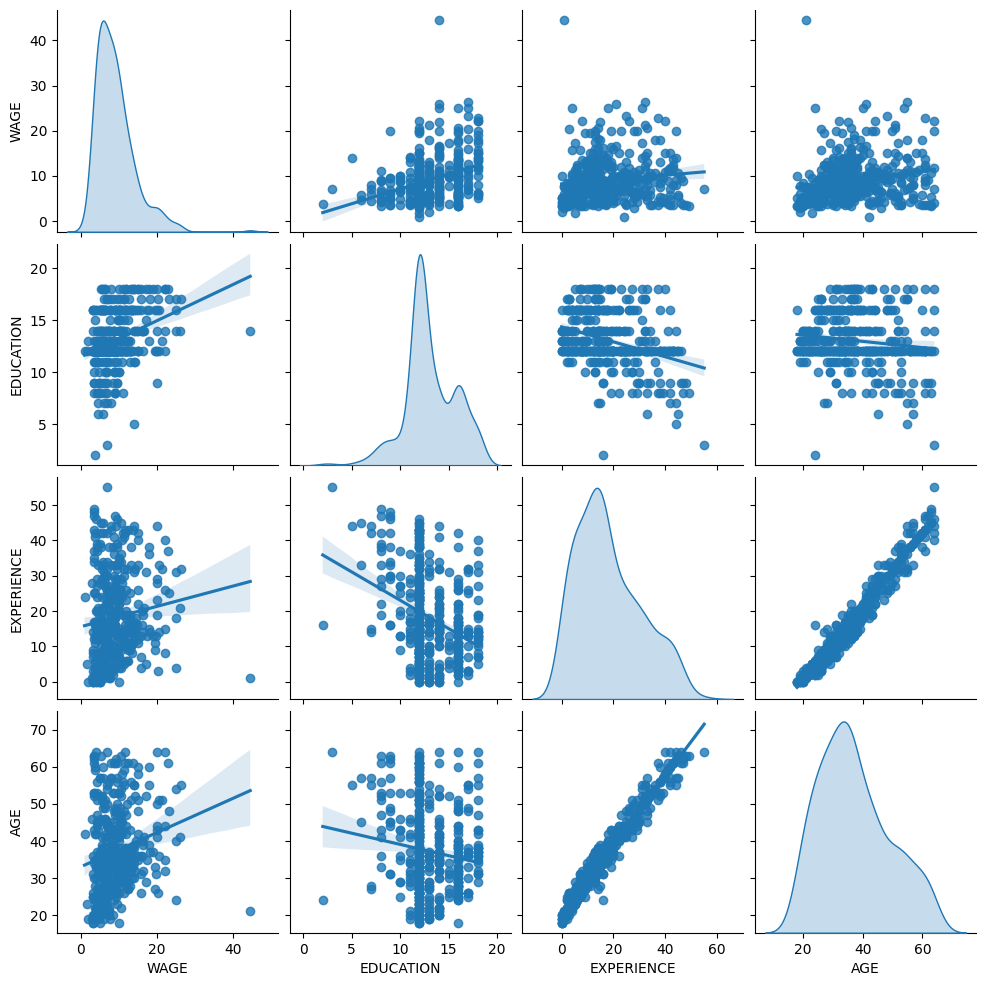

In [ ]:
train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
_ = sns.pairplot(
    train_dataset,
    kind="reg",
    diag_kind="kde",
    # hue='SEX'
)

Как соотносятся между собой линейная регрессия, обученная на полных данных, и столбце WAGE этого графика? Может-ли отличаться знак коэффициента?

Знак коэффициента в полной модели может отличаться от знака наклона на графике (и от знака простой корреляции). Это нормально и бывает при сильной зависимости признаков друг от друга.

## Распреление targetа

Какое-то распределение целевой переменной совсем не нормальное, с длинным хвостом.

Как думаете, плохо ли это? А почему?


(array([ 3., 32., 62., 57., 52., 52., 39., 29., 23., 11.,  8.,  7.,  3.,
        10.,  4.,  2.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 1.  ,  2.45,  3.9 ,  5.35,  6.8 ,  8.25,  9.7 , 11.15, 12.6 ,
        14.05, 15.5 , 16.95, 18.4 , 19.85, 21.3 , 22.75, 24.2 , 25.65,
        27.1 , 28.55, 30.  , 31.45, 32.9 , 34.35, 35.8 , 37.25, 38.7 ,
        40.15, 41.6 , 43.05, 44.5 ]),
 <BarContainer object of 30 artists>)

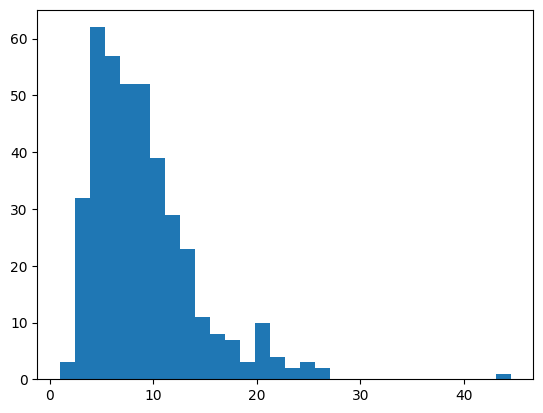

In [ ]:
plt.hist(y_train, bins=30)

(array([ 1.,  0.,  0.,  2.,  0.,  0.,  2., 20., 18., 25., 28., 27., 29.,
        34., 29., 40., 34., 28., 23., 20.,  8.,  7., 12.,  7.,  4.,  1.,
         0.,  0.,  0.,  1.]),
 array([0.69314718, 0.79729935, 0.90145152, 1.0056037 , 1.10975587,
        1.21390804, 1.31806021, 1.42221238, 1.52636455, 1.63051672,
        1.7346689 , 1.83882107, 1.94297324, 2.04712541, 2.15127758,
        2.25542975, 2.35958192, 2.4637341 , 2.56788627, 2.67203844,
        2.77619061, 2.88034278, 2.98449495, 3.08864713, 3.1927993 ,
        3.29695147, 3.40110364, 3.50525581, 3.60940798, 3.71356015,
        3.81771233]),
 <BarContainer object of 30 artists>)

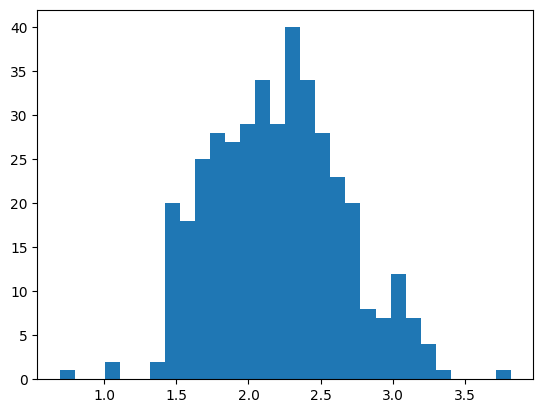

In [ ]:
import numpy as np

# А как численно оценить нормальность распределения и как ее исправить?
# можно взять логарифм
y_train_norm = np.log(y_train + 1)

plt.hist(y_train_norm, bins=30)

In [ ]:
from scipy.stats import shapiro

# можно воспользоваться Тестом Шапиро–Уилка
stat, p = shapiro(y_train_norm)
print(stat, p)

if p > 0.05:
    print("Распределение нормальное")
else:
    print("Распределение НЕ нормальное")

0.9906430874115327 0.012178011896235557
Распределение НЕ нормальное


In [ ]:
# типы данных
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    int64   
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    int64   
 4   UNION       534 non-null    category
 5   AGE         534 non-null    int64   
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), int64(3)
memory usage: 17.3 KB


## Подготовка:
    * OneHotEncoding для категориальных фичей (кроме бинарных, их выбросим)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

categorical_columns = ["RACE", "OCCUPATION", "SECTOR", "MARR", "UNION", "SEX", "SOUTH"]
numerical_columns = ["EDUCATION", "EXPERIENCE", "AGE"]


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            categorical_columns,
        ),
        ("num", "passthrough", numerical_columns),
    ],
    remainder="drop",
)

## Основной пайплайн

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, Ridge(alpha=0.0001))

## Обучение


In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['RACE', 'OCCUPATION',
                                                   'SECTOR', 'MARR', 'UNION',
                                                   'SEX', 'SOUTH']),
                                                 ('num', 'passthrough',
                                                  ['EDUCATION', 'EXPERIENCE',
                                                   'AGE'])])),
                ('ridge', Ridge(alpha=0.0001))])

In [ ]:
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}
scores

{'MedAE on training set': '2.25 $/hour', 'MedAE on testing set': '2.35 $/hour'}

### А это что за график?

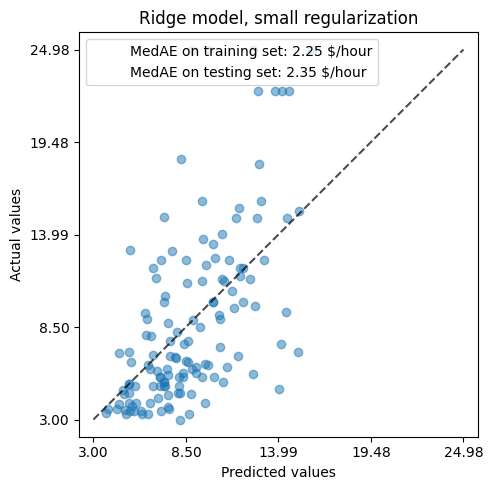

In [ ]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

Это график фактические значения против предсказанных, где по оси X отложена зарплата, предсказанная моделью, по оси Y - реальная зарплата, а пунктирная диагональ показывает линию идеальных предсказаний.

## Интерпретация, предостережение 0
Все выводы, которые мы делаем, мы делаем о нашей модели. Все выводы о реальном мире должны делаться поправкой на качество предсказаний.
Бывают данные, в которых зависимость не может быть линейной. Пример?

## Интерпретация, предостережение 1
Единицы измерений

In [ ]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
cat__RACE_Other,-0.029318
cat__RACE_White,0.764172
cat__OCCUPATION_Management,3.107687
cat__OCCUPATION_Other,0.030828
cat__OCCUPATION_Professional,1.912421
cat__OCCUPATION_Sales,-0.386257
cat__OCCUPATION_Service,-0.843663
cat__SECTOR_Manufacturing,0.926387
cat__SECTOR_Other,-0.277451
cat__MARR_Unmarried,-0.335983


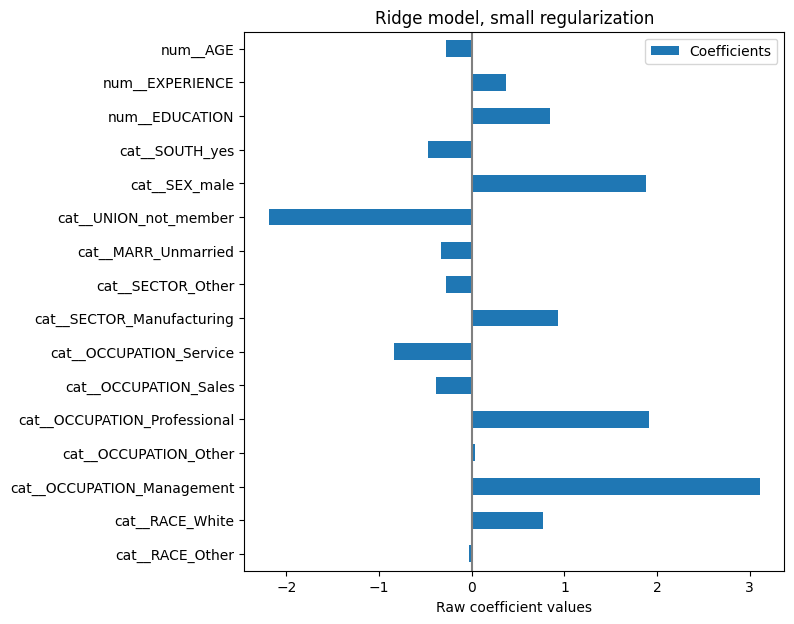

In [ ]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

### Среднеквадратические отклонения в фичах

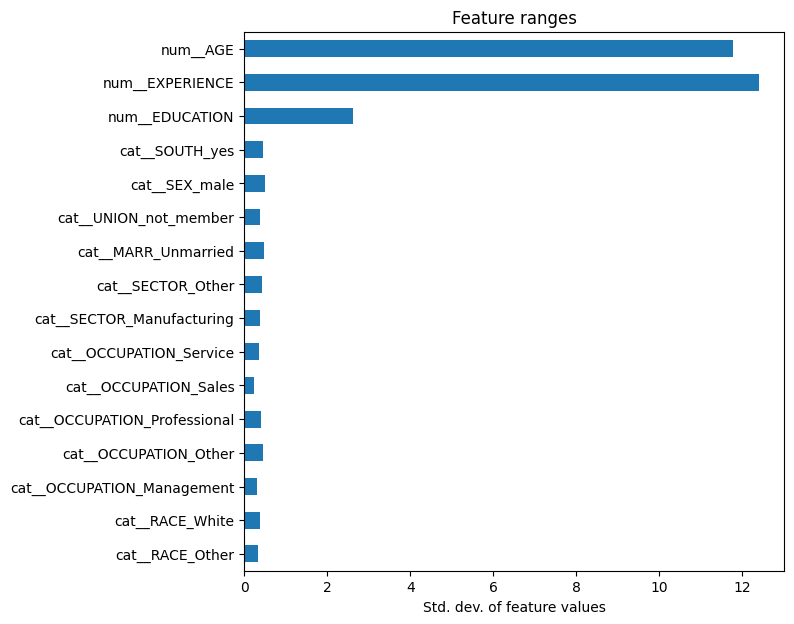

In [ ]:
X_train_preprocessed = pd.DataFrame(
    model[:-1].transform(X_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot.barh(figsize=(9, 7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)

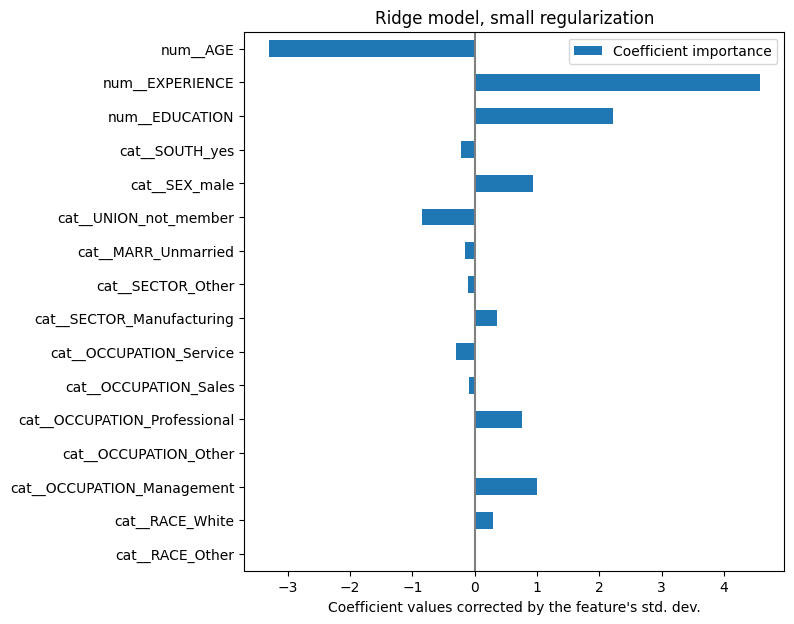

In [ ]:
stds = X_train_preprocessed.std(axis=0).values

coefs = pd.DataFrame(
    model[-1].coef_ * stds,
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Сожно домножить на SD, можно наоборот отнормировать фичи так, чтобы SD было 1.

# Интерпретация, предостережние 2

Что-нибудь вас здесь насторожило? AGE, например?

А насколько мы вообще уверены в наших коэффициентах? Как это можно оценить?

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].coef_ * est[:-1].transform(X.iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names,
)

# Ящики с усами
![](https://upload.wikimedia.org/wikipedia/commons/3/32/Densityvsbox.png)

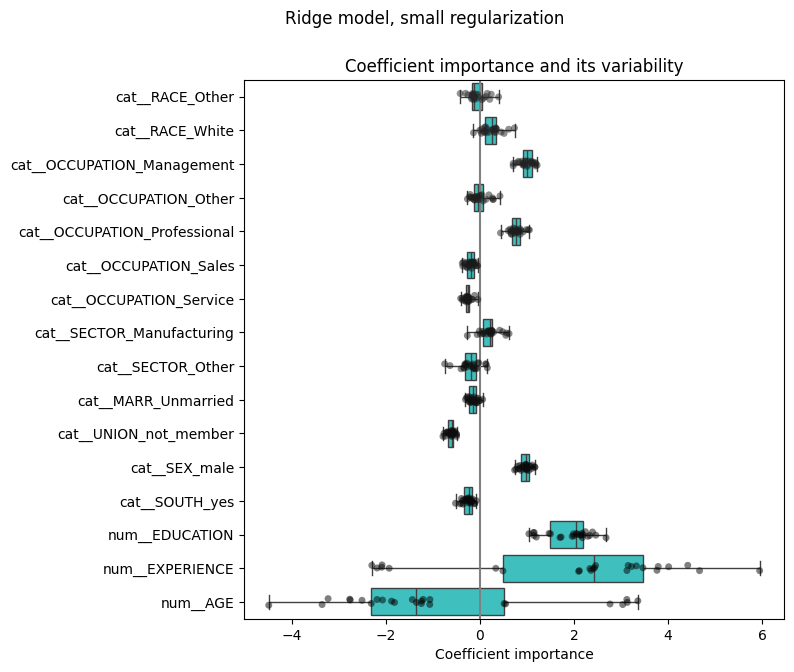

In [ ]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge model, small regularization")
plt.subplots_adjust(left=0.3)

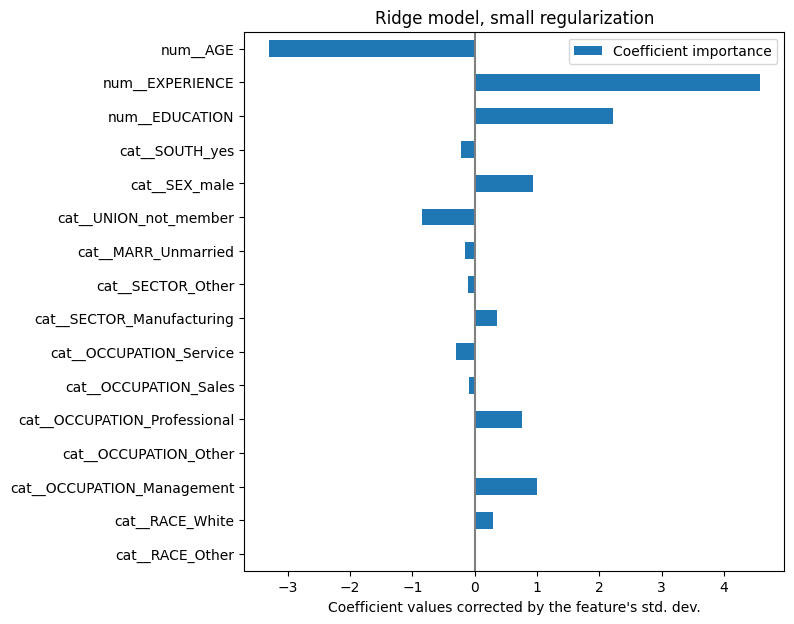

In [ ]:
coefs = pd.DataFrame(
    model[-1].coef_ * X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

# Интерпретация, предостережение 3

Скоррелированные переменные это зло!

KeyError: 'AGE'

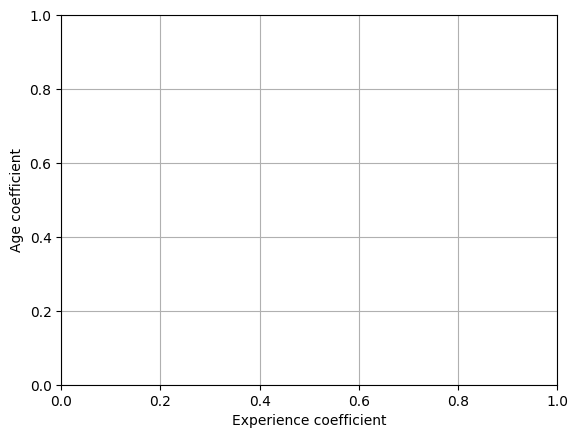

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].coef_ * est[:-1].transform(X.iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names,
)

plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

In [ ]:
column_to_drop = ["EXPERIENCE"]

cv_model = cross_validate(
    model,
    X.drop(columns=column_to_drop),
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].coef_
        * est[:-1].transform(X.drop(columns=column_to_drop).iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names[:-1],
)
coefs

ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'EXPERIENCE'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_indexing.py", line 364, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'EXPERIENCE'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py", line 993, in fit_transform
    self._validate_column_callables(X)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py", line 552, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_indexing.py", line 372, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


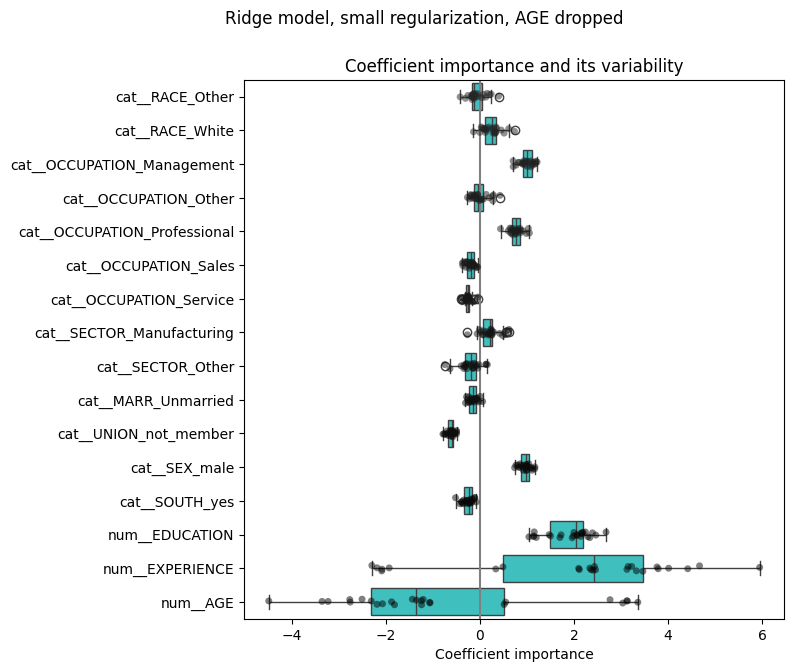

In [ ]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient importance and its variability")
plt.xlabel("Coefficient importance")
plt.suptitle("Ridge model, small regularization, AGE dropped")
plt.subplots_adjust(left=0.3)

## Регуляризация.

Что необходимо изменить в нашем пайпайне?

In [ ]:
from sklearn.preprocessing import StandardScaler

preprocessor = ...

In [ ]:
model = make_pipeline(
    preprocessor,
    Ridge(alpha=1e-10)
)
model.fit(X_train, y_train)

In [ ]:
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [ ]:
model[-1].coef_.shape, feature_names.shape

In [ ]:
coefs = pd.DataFrame(
    model[-1].coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [ ]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_model["estimator"]], columns=feature_names
)

In [ ]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

## Регуляризация

Сначала попробуем обычную L2 регуляризацию.

Как думаете, что произойдет с коэффициентами?

А что произойдет с их дисперсией?



In [ ]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation
model = make_pipeline(
    preprocessor,
    RidgeCV(alphas=alphas),
)
model.fit(X_train, y_train)

In [ ]:
model[-1].alpha_

In [ ]:
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, optimum regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

Кажется, качесво наших предсказаний почти не поменялось


In [ ]:
coefs = pd.DataFrame(
    model[-1].coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, with regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [ ]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_model["estimator"]], columns=feature_names
)

In [ ]:
plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

In [ ]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_model["estimator"]], columns=feature_names
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

## Linear models with sparse coefficients (Lasso)

Помните, зачем она нужна? А что произойдет с скореллированными переменными?

In [ ]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-1, -1, 1)  # alpha values to be chosen from by cross-validation
model = make_pipeline(
    preprocessor,
    LassoCV(alphas=alphas, max_iter=100_000),
)

_ = model.fit(X_train, y_train)

In [ ]:
model[-1].alpha_

In [ ]:
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $/hour",
    "MedAE on testing set": f"{mae_test:.2f} $/hour",
}

_, ax = plt.subplots(figsize=(6, 6))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Lasso model, optimum regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [ ]:
coefs = pd.DataFrame(
    model[-1].coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
print(model[-1].alpha_)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, optimum regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [ ]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_model["estimator"]], columns=feature_names
)

In [ ]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=100)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

# Интерапретация: проедупреждение 5
Корреляция не означает причинно-следственную связь.

In [ ]:
n_samples = 10_000
rng = np.random.RandomState(32)

experiences = rng.normal(20, 10, size=n_samples).astype(int)
experiences[experiences < 0] = 0
abilities = rng.normal(0, 0.15, size=n_samples)
parent_hourly_wages = 50 * rng.beta(2, 8, size=n_samples)
parent_hourly_wages[parent_hourly_wages < 0] = 0
college_degrees = (
    9 * abilities + 0.02 * parent_hourly_wages + rng.randn(n_samples) > 0.7
).astype(int)

true_coef = pd.Series(
    {
        "college degree": 2.0,
        "ability": 5.0,
        "experience": 0.2,
        "parent hourly wage": 1.0,
    }
)
hourly_wages = (
    true_coef["experience"] * experiences
    + true_coef["parent hourly wage"] * parent_hourly_wages
    + true_coef["college degree"] * college_degrees
    + true_coef["ability"] * abilities
    + rng.normal(0, 1, size=n_samples)
)

hourly_wages[hourly_wages < 0] = 0

In [ ]:
df = pd.DataFrame(
    {
        "college degree": college_degrees,
        "ability": abilities,
        "hourly wage": hourly_wages,
        "experience": experiences,
        "parent hourly wage": parent_hourly_wages,
    }
)

grid = sns.pairplot(df, diag_kind="kde", corner=True)

In [ ]:
target_name = "hourly wage"
X, y = df.drop(columns=target_name), df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import r2_score

# кстати, кто такой R^2?

features_names = ["experience", "parent hourly wage", "college degree", "ability"]

regressor_with_ability = LinearRegression()
regressor_with_ability.fit(X_train[features_names], y_train)
y_pred_with_ability = regressor_with_ability.predict(X_test[features_names])
R2_with_ability = r2_score(y_test, y_pred_with_ability)

print(f"R2 score with ability: {R2_with_ability:.3f}")

In [ ]:
import matplotlib.pyplot as plt

model_coef = pd.Series(regressor_with_ability.coef_, index=features_names)
coef = pd.concat(
    [true_coef[features_names], model_coef],
    keys=["Coefficients of true generative model", "Model coefficients"],
    axis=1,
)
ax = coef.plot.barh()
ax.set_xlabel("Coefficient values")
ax.set_title("Coefficients of the linear regression including the ability features")
_ = plt.tight_layout()

In [ ]:
features_names = ["experience", "parent hourly wage", "college degree"]

regressor_without_ability = LinearRegression()
regressor_without_ability.fit(X_train[features_names], y_train)
y_pred_without_ability = regressor_without_ability.predict(X_test[features_names])
R2_without_ability = r2_score(y_test, y_pred_without_ability)

print(f"R2 score without ability: {R2_without_ability:.3f}")

In [ ]:
model_coef = pd.Series(regressor_without_ability.coef_, index=features_names)
coef = pd.concat(
    [true_coef[features_names], model_coef],
    keys=["Coefficients of true generative model", "Model coefficients"],
    axis=1,
)
ax = coef.plot.barh()
ax.set_xlabel("Coefficient values")
_ = ax.set_title("Coefficients of the linear regression excluding the ability feature")
plt.tight_layout()
plt.show()

# Задача со звездочкой 10. Happiness (3 балла)
Возьмите большой социологический датасет (например, World Value Survey) и узнайте, наконец, что делает людей счастливыми. Дизайн исследования на ваше усмотрение.

Оценка ставится, если вы присылаете читаемый и прокомментированный ноутбук, в котором отсутствуют ошибки дизайна исслледований, о которых мы говорили сегодня. Еще, мне будет гораздо приятнее проверять работы, в которых у вас получается выудить какой-то нетривиальный паттерн в этих данных, а не "инсоляция и доход повышают expexted happiness, a войны -- понижают".

In [ ]:
!pip install -q kaggle

from google.colab import files

uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download miroslavsabo/young-people-survey
!unzip young-people-survey.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/miroslavsabo/young-people-survey
License(s): CC0-1.0
  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 271MB/s]
Archive:  young-people-survey.zip
  inflating: columns.csv             
  inflating: responses.csv           


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# датасет: https://www.kaggle.com/datasets/miroslavsabo/young-people-survey/data
df = pd.read_csv("responses.csv")

R^2 на тестовой выборке: 0.237

Коэффициенты линейной регрессии (в исходных единицах признаков):
Energy levels        0.287359
Number of friends    0.135201
Finances             0.043026
Health               0.017829
Socializing          0.004148
Age                  0.002508
Life struggles      -0.070984
dtype: float64


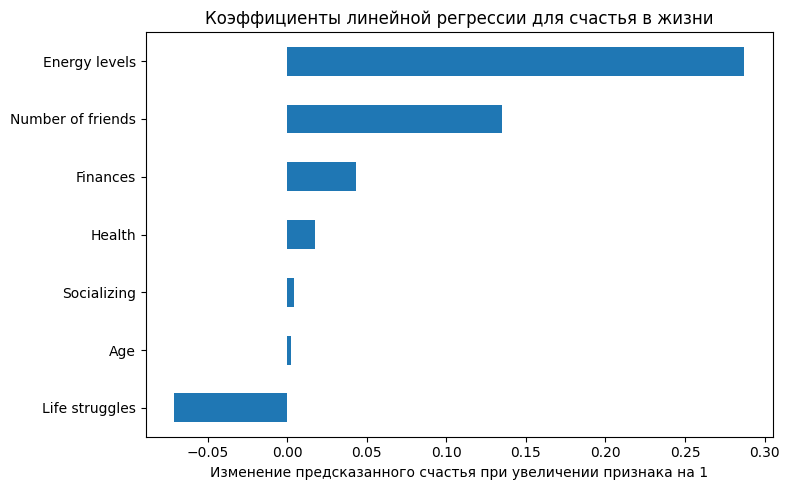


Интерпретация признаков (по знаку коэффициента):
- Age: коэффициент = 0.003 → практически не связан с ожидаемым уровнем счастья
- Finances: коэффициент = 0.043 → связан с БОЛЕЕ высоким ожидаемым уровнем счастья
- Health: коэффициент = 0.018 → связан с БОЛЕЕ высоким ожидаемым уровнем счастья
- Number of friends: коэффициент = 0.135 → связан с БОЛЕЕ высоким ожидаемым уровнем счастья
- Socializing: коэффициент = 0.004 → практически не связан с ожидаемым уровнем счастья
- Life struggles: коэффициент = -0.071 → связан с НИЗКИМ ожидаемым уровнем счастья
- Energy levels: коэффициент = 0.287 → связан с БОЛЕЕ высоким ожидаемым уровнем счастья


In [ ]:
target = "Happiness in life"
features = [
    "Age",
    "Finances",
    "Health",
    "Number of friends",
    "Socializing",
    "Life struggles",
    "Energy levels",
]

# Оставляем только нужные столбцы и выкидываем пропуски
data = df[features + [target]].dropna()

X = data[features]
y = data[target]

# 3. Делим на train / test для оценки качества модели
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Строим интерпретируемую линейную регрессию
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R^2 на тестовой выборке: {r2:.3f}")

# 5. Смотрим на коэффициенты модели
coefs = pd.Series(reg.coef_, index=features)
print("\nКоэффициенты линейной регрессии (в исходных единицах признаков):")
print(coefs.sort_values(ascending=False))

# 6. Визуализация важности (по знаку и величине коэффициента)
plt.figure(figsize=(8, 5))
coefs.sort_values().plot(kind="barh")
plt.title("Коэффициенты линейной регрессии для счастья в жизни")
plt.xlabel("Изменение предсказанного счастья при увеличении признака на 1")
plt.tight_layout()
plt.show()

# 7. Простейшая "история": какой признак повышает / понижает ожидаемое счастье
print("\nИнтерпретация признаков (по знаку коэффициента):")
for feat, coef in coefs.items():
    if abs(coef) < 0.01:
        effect = "практически не связан с ожидаемым уровнем счастья"
    elif coef > 0:
        effect = "связан с БОЛЕЕ высоким ожидаемым уровнем счастья"
    else:
        effect = "связан с НИЗКИМ ожидаемым уровнем счастья"
    print(f"- {feat}: коэффициент = {coef:.3f} → {effect}")

---

This notebook is heavily based on [this page](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html) at sklearn user guide.